In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import plotly.graph_objs as go
import numpy as np
import warnings
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

In [52]:
df=pd.read_csv(r"..\processed data\temp\colombo_fomaldehyde.csv")
print(df.shape)
df.head(10)

(1826, 4)


,Current_Date,Location,Next_Date,HCHO_reading
0,2019-01-01,Colombo Proper,2019-01-02,0.000197
1,2019-01-02,Colombo Proper,2019-01-03,0.000263
2,2019-01-03,Colombo Proper,2019-01-04,0.000099
3,2019-01-04,Colombo Proper,2019-01-05,0.000210
4,2019-01-05,Colombo Proper,2019-01-06,0.000179
5,2019-01-06,Colombo Proper,2019-01-07,0.000108
6,2019-01-07,Colombo Proper,2019-01-08,0.000393
7,2019-01-08,Colombo Proper,2019-01-09,0.000092
8,2019-01-09,Colombo Proper,2019-01-10,0.000121
9,2019-01-10,Colombo Proper,2019-01-11,0.000130


In [3]:
df['Current_Date']=pd.to_datetime(df['Current_Date'])

In [4]:
# df.set_index('Current_Date', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Current_Date  1826 non-null   datetime64[ns]
 1   Location      1826 non-null   object        
 2   Next_Date     1826 non-null   object        
 3   rolling_3     1826 non-null   float64       
 4   HCHO_reading  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 71.5+ KB


# Colombo

# FB Prophet

In [6]:
# pip install prophet

In [7]:
from prophet import Prophet
from sklearn.model_selection import train_test_split


In [40]:
data = pd.read_csv(r"..\processed data\temp\colombo_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)
data.rename(columns={'Current_Date': 'ds', 'HCHO_reading': 'y'}, inplace=True)
data['ds'] = pd.to_datetime(data['ds'])

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train, test = train_test_split(data, test_size=0.1, shuffle=False)

In [42]:
covid_holidays = pd.DataFrame({
    'holiday': 'covid_19',
    'ds': pd.to_datetime(['2020-03-01', '2022-03-01']),
    #'lower_window': 0,
    #'upper_window': 1,
})

# Create the model (data argument removed)
model = Prophet( changepoint_prior_scale=0.45,  # More flexible trend try-0.2
                 seasonality_prior_scale=5,
                 holidays=covid_holidays
               )

# Fit the model on the training data
model.fit(train)

future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)
r2_score(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])
mean_squared_error(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])

14:48:08 - cmdstanpy - INFO - Chain [1] start processing
14:48:08 - cmdstanpy - INFO - Chain [1] done processing


4.569194718038498e-09

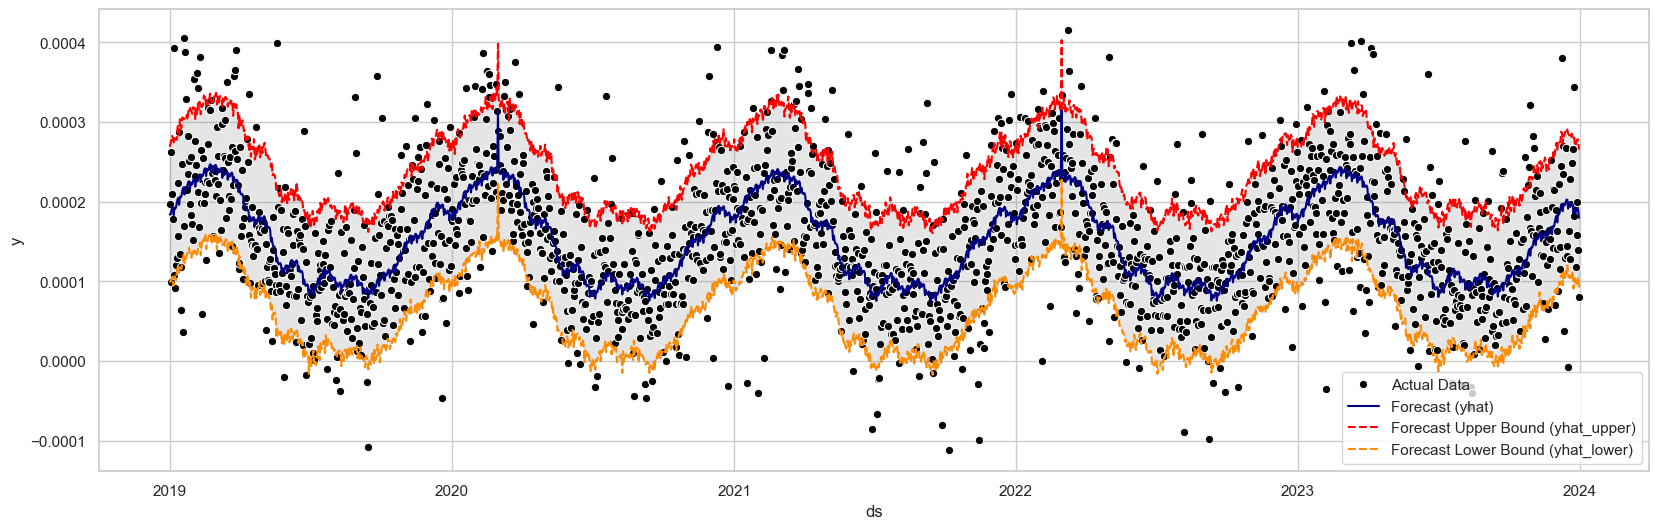

In [43]:
plt.figure(figsize=(20, 6))

# Plot actual data
sns.lineplot(data=data, x='ds', y='y', label='Actual Data', color='black', marker='o', linestyle='None')

# Plot yhat - forecast
sns.lineplot(data=forecast, x='ds', y='yhat', label='Forecast (yhat)', color='navy')

# Plot yhat_upper
sns.lineplot(data=forecast, x='ds', y='yhat_upper', label='Forecast Upper Bound (yhat_upper)', color='red', linestyle='--')

# Plot yhat_lower
sns.lineplot(data=forecast, x='ds', y='yhat_lower', label='Forecast Lower Bound (yhat_lower)', color='darkorange', linestyle='--')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='grey', alpha=0.5, label='Confidence_interval')

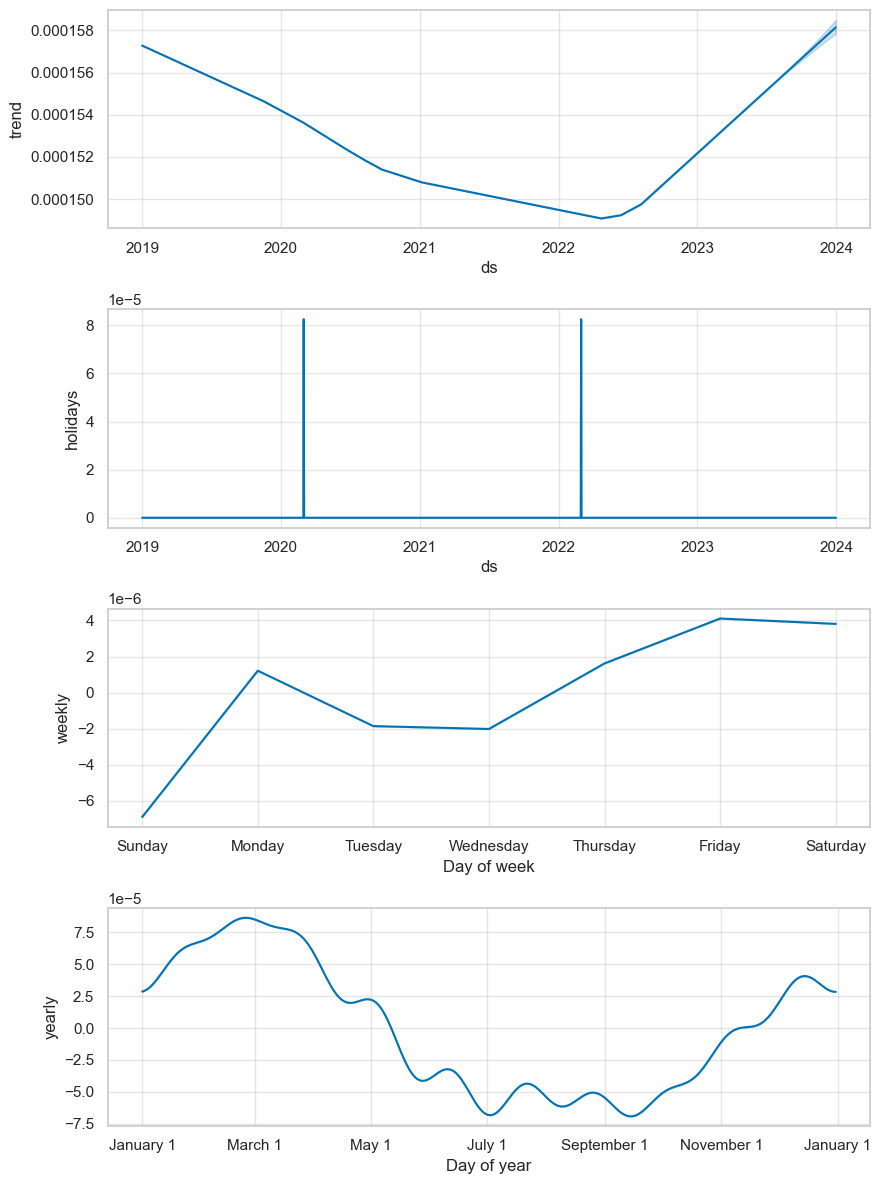

In [44]:
# Plot the forecast components
fig2 = model.plot_components(forecast)

# LSTM

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0518
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0184
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0180
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0192
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0180
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0198
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0213  
Train Loss: 0.017927268519997597
Test Loss: 0.01946062594652176
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


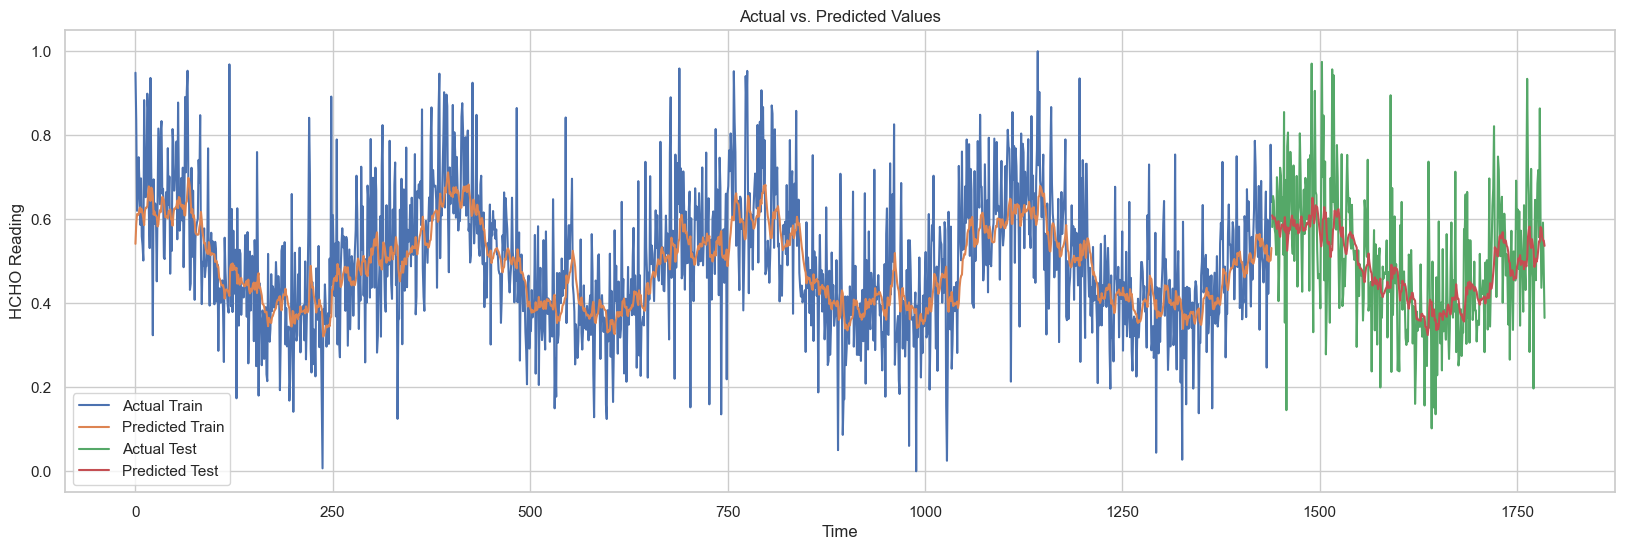

Train MSE: 0.017927267947395506
Test MSE: 0.01928471879592731
Train R2 Score: 0.33021246035620566
Test R2 Score: 0.23683939281785027


In [74]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset

data = pd.read_csv(r"..\processed data\temp\colombo_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)

# Preprocessing
scaler = MinMaxScaler()
data['HCHO_reading'] = scaler.fit_transform(data['HCHO_reading'].values.reshape(-1, 1))

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Define function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Choose sequence length (number of time steps to consider)
seq_length =20

# Create sequences for training
X_train, y_train = create_sequences(train_data['HCHO_reading'].values, seq_length)
X_test, y_test = create_sequences(test_data['HCHO_reading'].values, seq_length)

# Define the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(y_train)), y_train, label='Actual Train')
plt.plot(np.arange(len(y_train_pred)), y_train_pred, label='Predicted Train')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test_pred)), y_test_pred, label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Calculate R2 Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0168 - val_loss: 0.0193
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - val_loss: 0.0196
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0187 - val_loss: 0.0200
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - val_loss: 0.0194
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168 - val_loss: 0.0194
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0190 - val_loss: 0.0191
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - val_loss: 0.0194
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0176 - val_loss: 0.0191
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0183 - val_loss: 0.0193
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0184 - val_loss: 0.0192


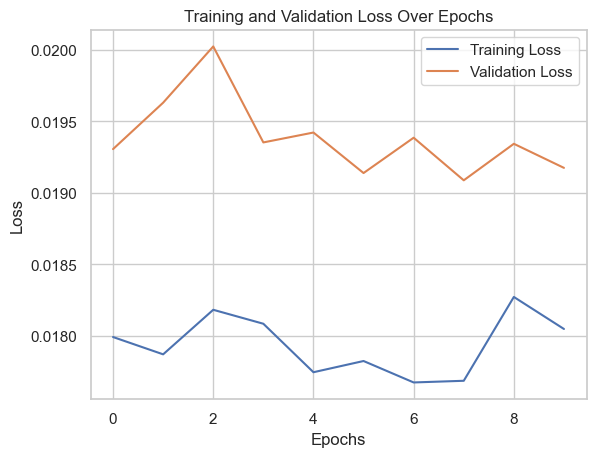

In [75]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


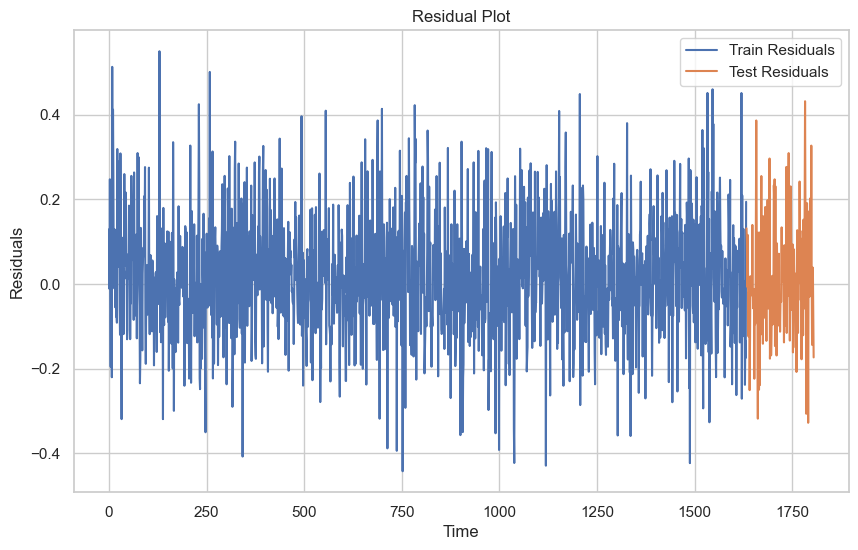

In [50]:
train_residuals = y_train - y_train_pred.flatten()
test_residuals = y_test - y_test_pred.flatten()

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_residuals)), train_residuals, label='Train Residuals')
plt.plot(np.arange(len(y_train), len(y_train) + len(test_residuals)), test_residuals, label='Test Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


<div style="border-bottom: 2px solid black;"></div>

# Nuwara Eliya

In [137]:
data = pd.read_csv(r"..\processed data\temp\nuwara_eliya_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)
data.rename(columns={'Current_Date': 'ds', 'HCHO_reading': 'y'}, inplace=True)
data['ds'] = pd.to_datetime(data['ds'])

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train, test = train_test_split(data, test_size=0.1, shuffle=False)

In [138]:
covid_holidays = pd.DataFrame({
    'holiday': 'covid_19',
    'ds': pd.to_datetime(['2020-03-01', '2022-03-01']),
    #'lower_window': 0,
    #'upper_window': 1,
})

# Create the model (data argument removed)
model = Prophet( changepoint_prior_scale=0.2,  # More flexible trend
                 seasonality_prior_scale=5,
                 holidays=covid_holidays
               )

# Fit the model on the training data
model.fit(train)

future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)
r2_score(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])
mean_squared_error(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])

16:14:21 - cmdstanpy - INFO - Chain [1] start processing
16:14:21 - cmdstanpy - INFO - Chain [1] done processing


4.4295444982328785e-09

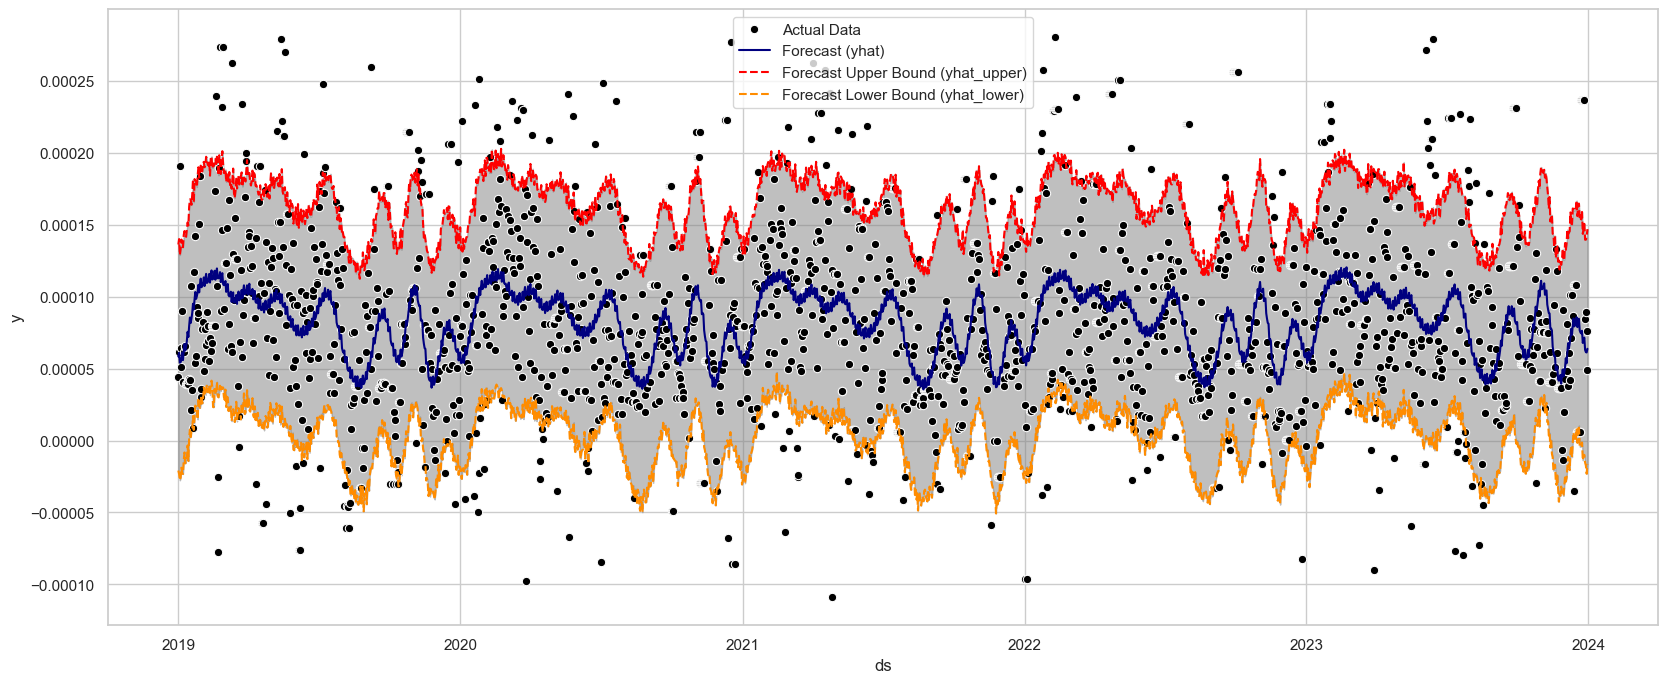

In [139]:
plt.figure(figsize=(20, 8))

# Plot actual data
sns.lineplot(data=data, x='ds', y='y', label='Actual Data', color='black', marker='o', linestyle='None')

# Plot yhat - forecast
sns.lineplot(data=forecast, x='ds', y='yhat', label='Forecast (yhat)', color='navy')

# Plot yhat_upper
sns.lineplot(data=forecast, x='ds', y='yhat_upper', label='Forecast Upper Bound (yhat_upper)', color='red', linestyle='--')

# Plot yhat_lower
sns.lineplot(data=forecast, x='ds', y='yhat_lower', label='Forecast Lower Bound (yhat_lower)', color='darkorange', linestyle='--')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='grey', alpha=0.5, label='Confidence_interval')

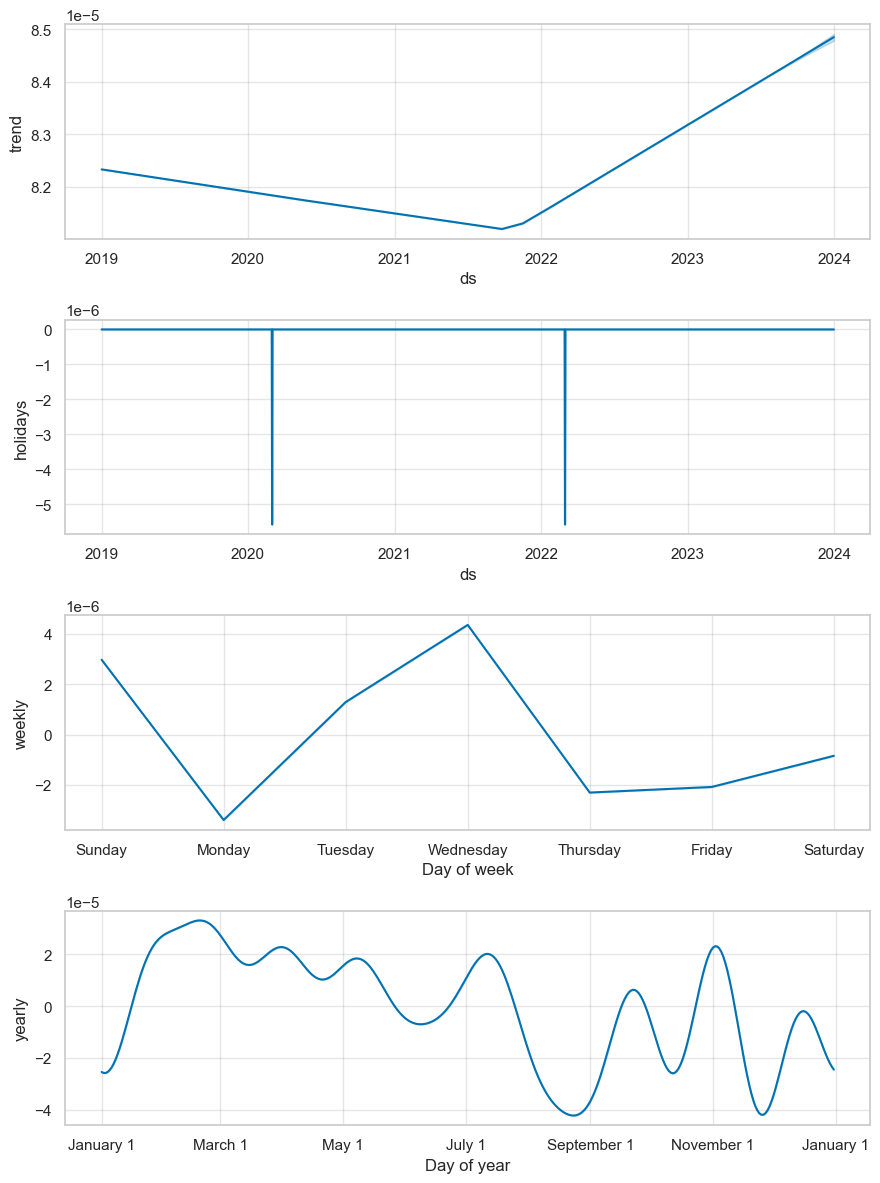

In [121]:
# Plot the forecast components
fig2 = model.plot_components(forecast)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1014
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0267
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0272
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0267
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0264
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0255
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0259
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0252
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0245
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0218  
Train Loss: 0.024677570909261703
Test Loss: 0.02350783534348011
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


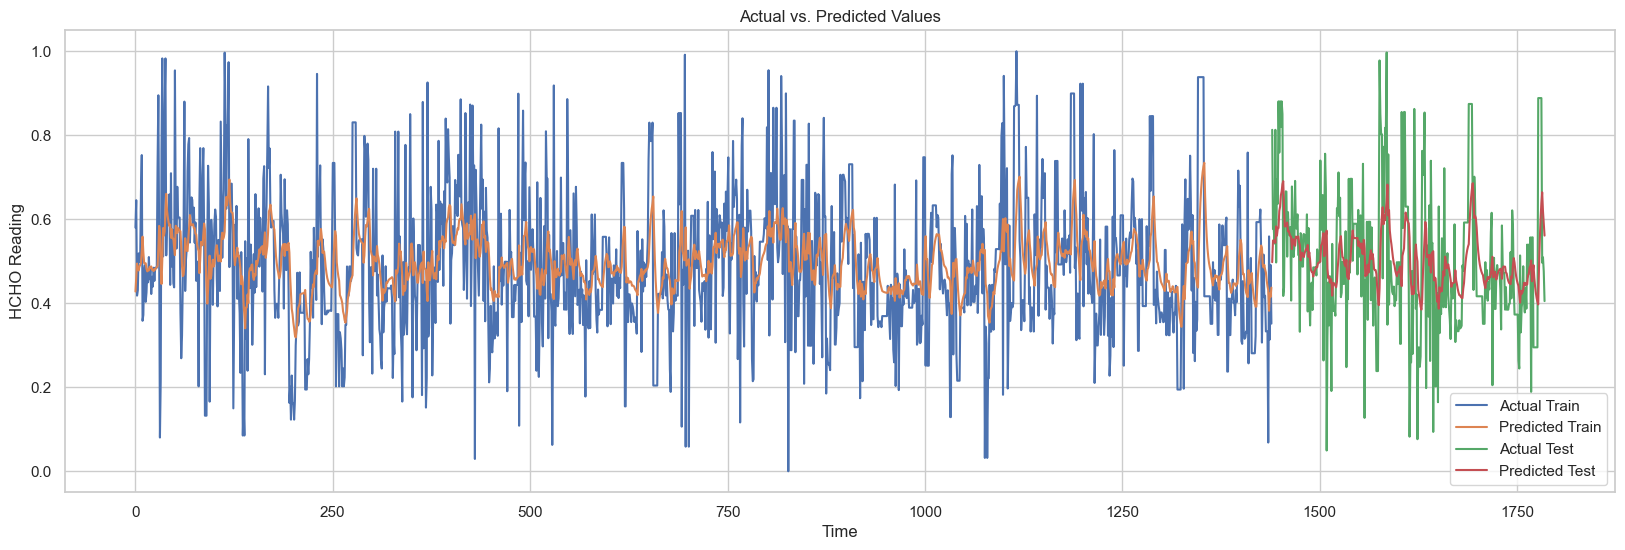

Train MSE: 0.02467757077617331
Test MSE: 0.02324157048405497
Train R2 Score: 0.15621212991084388
Test R2 Score: 0.18344446784523594


In [105]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset

data = pd.read_csv(r"..\processed data\temp\nuwara_eliya_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)

# Preprocessing
scaler = MinMaxScaler()
data['HCHO_reading'] = scaler.fit_transform(data['HCHO_reading'].values.reshape(-1, 1))

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Define function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Choose sequence length (number of time steps to consider)
seq_length =20

# Create sequences for training
X_train, y_train = create_sequences(train_data['HCHO_reading'].values, seq_length)
X_test, y_test = create_sequences(test_data['HCHO_reading'].values, seq_length)

# Define the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(y_train)), y_train, label='Actual Train')
plt.plot(np.arange(len(y_train_pred)), y_train_pred, label='Predicted Train')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test_pred)), y_test_pred, label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Calculate R2 Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')


<div style="border-bottom: 2px solid black;"></div>

# Matara

In [140]:
data = pd.read_csv(r"..\processed data\temp\matara_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)
data.rename(columns={'Current_Date': 'ds', 'HCHO_reading': 'y'}, inplace=True)
data['ds'] = pd.to_datetime(data['ds'])

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train, test = train_test_split(data, test_size=0.1, shuffle=False)

In [141]:
covid_holidays = pd.DataFrame({
    'holiday': 'covid_19',
    'ds': pd.to_datetime(['2020-03-01', '2022-03-01']),
    #'lower_window': 0,
    #'upper_window': 1,
})

# Create the model (data argument removed)
model = Prophet( changepoint_prior_scale=0.2,  # More flexible trend
                 seasonality_prior_scale=5,
                 holidays=covid_holidays
               )

# Fit the model on the training data
model.fit(train)

future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)
r2_score(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])
mean_squared_error(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])

16:15:35 - cmdstanpy - INFO - Chain [1] start processing
16:15:35 - cmdstanpy - INFO - Chain [1] done processing


7.622746412645113e-09

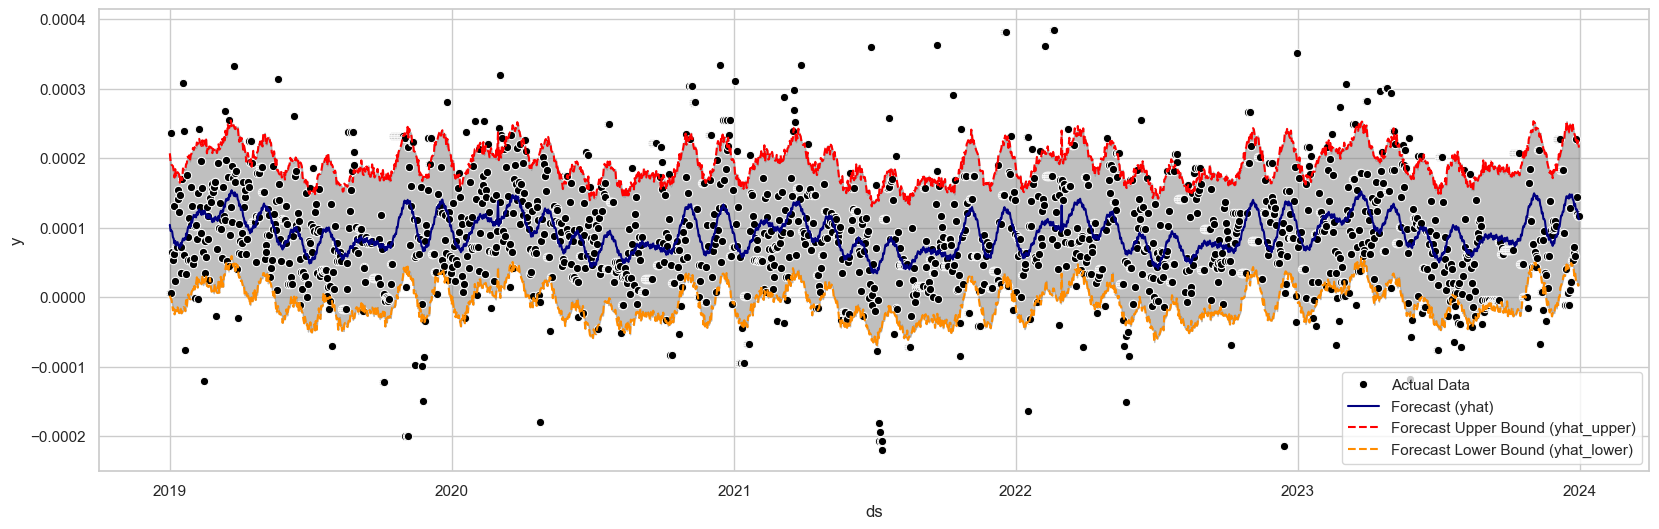

In [142]:
plt.figure(figsize=(20, 6))

# Plot actual data
sns.lineplot(data=data, x='ds', y='y', label='Actual Data', color='black', marker='o', linestyle='None')

# Plot yhat - forecast
sns.lineplot(data=forecast, x='ds', y='yhat', label='Forecast (yhat)', color='navy')

# Plot yhat_upper
sns.lineplot(data=forecast, x='ds', y='yhat_upper', label='Forecast Upper Bound (yhat_upper)', color='red', linestyle='--')

# Plot yhat_lower
sns.lineplot(data=forecast, x='ds', y='yhat_lower', label='Forecast Lower Bound (yhat_lower)', color='darkorange', linestyle='--')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='grey', alpha=0.5, label='Confidence_interval')

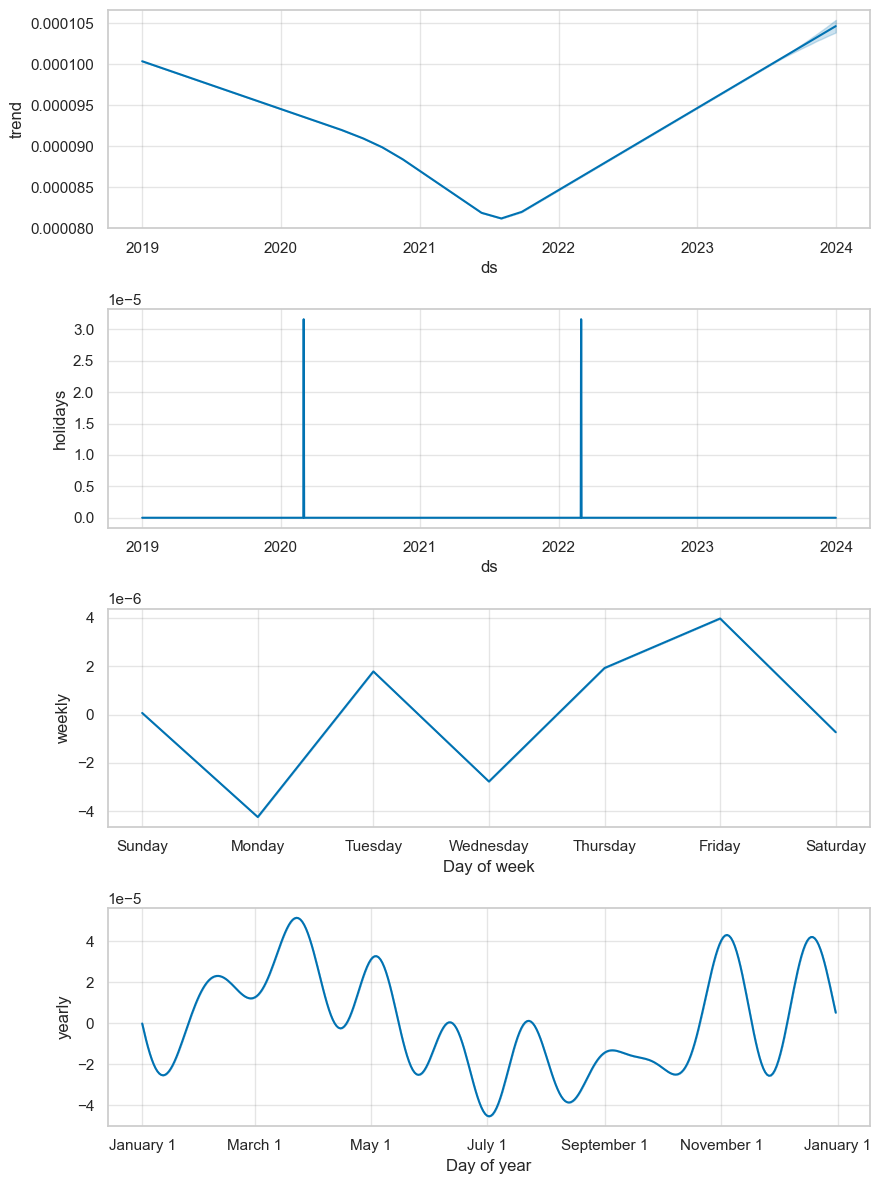

In [136]:
# Plot the forecast components
fig2 = model.plot_components(forecast)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1114
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0193
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0164
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0212  
Train Loss: 0.01799786649644375
Test Loss: 0.019535185769200325
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


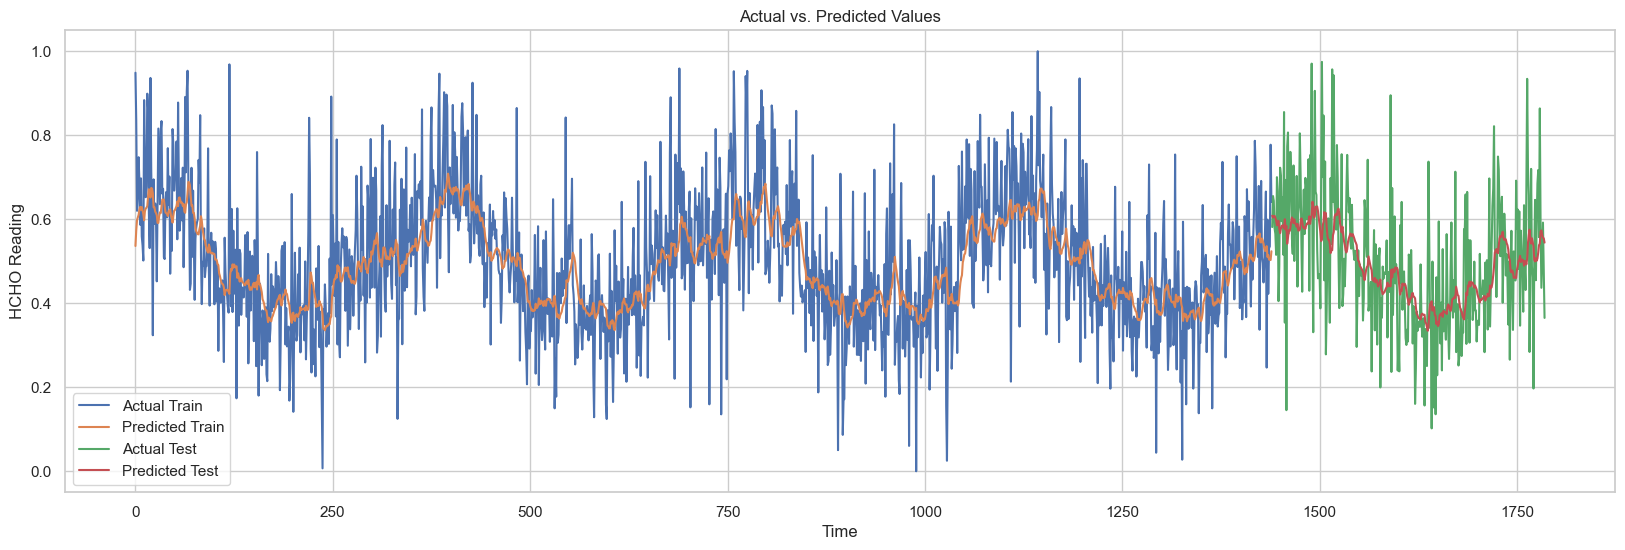

Train MSE: 0.01799786409749877
Test MSE: 0.01935296741377086
Train R2 Score: 0.32757489049197785
Test R2 Score: 0.2341385675071993


In [126]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset

data = pd.read_csv(r"..\processed data\temp\matara_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)

# Preprocessing
scaler = MinMaxScaler()
data['HCHO_reading'] = scaler.fit_transform(data['HCHO_reading'].values.reshape(-1, 1))

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Define function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Choose sequence length (number of time steps to consider)
seq_length =20

# Create sequences for training
X_train, y_train = create_sequences(train_data['HCHO_reading'].values, seq_length)
X_test, y_test = create_sequences(test_data['HCHO_reading'].values, seq_length)

# Define the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(y_train)), y_train, label='Actual Train')
plt.plot(np.arange(len(y_train_pred)), y_train_pred, label='Predicted Train')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test_pred)), y_test_pred, label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Calculate R2 Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')


# XG

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your data (replace with your data loading)
data = df.copy()
data.drop(columns=['Location','Next_Date'],inplace=True)

# # Feature engineering (replace with your specific features)
# data['year'] = pd.to_datetime(data['Current_Date']).dt.year
# data['month'] = pd.to_datetime(data['Current_Date']).dt.month
# data['day_of_week'] = pd.to_datetime(data['Current_Date']).dt.dayofweek

# # Define COVID period (replace with your actual dates)
# covid_start = pd.to_datetime('2020-03-15')
# covid_end = pd.to_datetime('2022-06-30')
# data['covid_period'] = (data['Current_Date'] >= covid_start) & (data['Current_Date'] <= covid_end)
#data.drop(columns=['Current_Date'],inplace=True)


#Split data
train, test = train_test_split(data, test_size=0.2,shuffle=False)

# XGBoost model definition
model = XGBRegressor()

# Train the model
model.fit(train['Current_Date'], train['HCHO_reading'])

# Make predictions
predictions = model.predict(test['Current_Date'])

# Evaluate the model (e.g., MSE)
mse = mean_squared_error(train['HCHO_reading'], predictions)
print("Mean Squared Error:", mse)

# Feature importance (optional)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


In [ ]:


plt.figure(figsize=(20, 6))
plt.plot(test['Current_Date'], test['HCHO_reading'], label="test")
plt.plot(test['Current_Date'], predictions, label="forecast")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)  # Scatter plot of actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
//

# ARIAMA

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df[['HCHO_reading']])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df[['HCHO_reading']])
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def is_stationary(timeseries):
    """
    Check for stationarity using the Dickey-Fuller test.

    Args:
        timeseries: The time series data to check.

    Returns:
        A tuple containing a boolean indicating stationarity and the p-value of the Dickey-Fuller test.
    """

    dftest = adfuller(timeseries)
    dfvalue = dftest[0]
    pvalue = dftest[1]
    # Print the results of the Dickey-Fuller test
    print(f"ADF Statistic ({dfvalue})")
    print(f"p-Value ({pvalue})")
    print("\n")
    return dfvalue < 0.05  # Reject the null hypothesis if p-value is less than significance level (0.05)

# Example usage
is_stationary(df['HCHO_reading'])


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

def identify_arima_order(timeseries):
  """
  Identify ARIMA order (p, d, q) using ACF and PACF plots.

  Args:
      timeseries: The time series data.

  Returns:
      None (Plots the ACF and PACF)
  """
  # Check for stationarity (assuming you've already done this)
  # ... (Your stationarity check code)

  # Plot ACF and PACF
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
  lag_acf = acf(timeseries, nlags=30)
  ax1.plot(lag_acf)
  ax1.axhline(y=0, color='red', linestyle='--', alpha=0.7)
  ax1.set_title("Autocorrelation Function (ACF)")

  lag_pacf = pacf(timeseries, nlags=30)
  ax2.plot(lag_pacf)
  ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)
  ax2.set_title("Partial Autocorrelation Function (PACF)")
  plt.tight_layout()
  plt.show()

# Example usage
identify_arima_order(df['HCHO_reading'])


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt



# Fit ARIMA model
model = ARIMA(df['HCHO_reading'], order=(365, 0, 0))  # Example values for p, d, q
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(steps=365)

# Plot forecast
plt.figure(figsize=(20, 6))
plt.plot(df['HCHO_reading'], label='Original Data')
plt.plot( forecast, label='Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecast")
plt.show()
